<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout1_PartA_Univariate_Analysis_of_Response_Variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #1 Part A: Univariate Analysis of a Response Variable - Descriptive Summaries


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 1A.1

Consider the following Crater Impact study that was done here at Winona State Univeristy.  This study investigated the effect of certain variables on the size of an impact crater. 
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: Diameter of crater (cm)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>Hight from which projectile was dropped</li>
          <li>Projectile Type (glass, steel, or wood ball)</li>
          <li>Sand Type (course, fine)</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1-969XxPtKCcG9MeX4NMRfkTUTaMoj8cY"></img></p>
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)


YouTube: [Impact Craters](https://www.youtube.com/results?search_query=worlds+biggest+impact+craters)


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [ ]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

The **read_csv()** function is used to read in the dataset. 

In [12]:
#@title Readin Data

# Reading data in using read.csv via Base 
ImpactCrater <- read.csv("http://www.StatsClass.org/stat360/Datasets/ImpactCrater.csv")

The **head()** function can be used to see the first few lines of the dataset.  Similarly, the tail() function can be used to see the last few lines of a dataset.

In [ ]:
#@title View the first few rows of data
head(ImpactCrater)

## Basic Summary Statistics

In [ ]:
#@title Summarize an entire dataframe
#Using summary() to get summaries of a dataframe
summary(ImpactCrater)

       ID           SandType         ProjectileType         Height      
 Min.   :  1.00   Length:144         Length:144         Min.   : 25.00  
 1st Qu.: 36.75   Class :character   Class :character   1st Qu.: 68.75  
 Median : 72.50   Mode  :character   Mode  :character   Median :112.50  
 Mean   : 72.50                                         Mean   :112.50  
 3rd Qu.:108.25                                         3rd Qu.:156.25  
 Max.   :144.00                                         Max.   :200.00  
    Diameter     
 Min.   : 3.250  
 1st Qu.: 5.250  
 Median : 6.500  
 Mean   : 6.676  
 3rd Qu.: 7.850  
 Max.   :11.000  

In [ ]:
#@title Summarize only the response variable
#using select to specify only a single column
(ImpactCrater 
  %>% select(Diameter)
  %>% summary()
)

    Diameter     
 Min.   : 3.250  
 1st Qu.: 5.250  
 Median : 6.500  
 Mean   : 6.676  
 3rd Qu.: 7.850  
 Max.   :11.000  

In [ ]:
#@title Getting a specifc summary statistic
(ImpactCrater 
  %>% select(Diameter)
  %>% summarize(
                  Avg_Diameter=mean(Diameter)
               )
)

Avg_Diameter
<dbl>
6.675694


In [ ]:
#@title Getting several statistics

(ImpactCrater 
  %>% summarize(
                  Avg_Diameter = mean(Diameter),
                  Stdev_Diameter = sd(Diameter),
                  n_Diameter = n(),
                  Min_Diameter = min(Diameter),
                  Max_Diameter = max(Diameter)
                
               )
)

Avg_Diameter,Stdev_Diameter,n_Diameter,Min_Diameter,Max_Diameter
<dbl>,<dbl>,<int>,<dbl>,<dbl>
6.675694,1.724657,144,3.25,11


<table width='100%'><tr><td bgcolor="orange"><font size="+2">Task</font></td></tr></table>

### Task:  Questions



1.   What is the interpretation of the average?
2.   The formula for the standard deviation is $$\mbox{Standard Deviation} = \sqrt{\frac{\sum \mbox{(Data Point - Mean)}^2}{n-1}} $$
      What does is mean if the standard deviation is small?


<table width='100%'><tr><td bgcolor="orange"><font size="+2">&nbsp;</font></td></tr></table>

## Percentiles

Consider the following plot of all Diameter values.



<p align='center'><img src="https://drive.google.com/uc?export=view&id=1FT_h5DPlnbclW1OU_EeTpl9GUZAMC__q"></img></p>

From the output above, the **median = 6.5** which implies that 50% of the Diameter value are less than 6.5 and 50% of the Diameter values are above 6.5.  A **percentile** extends this idea to any % of interest.  

<table>
  <tr>
    <td align='left' bgcolor='green'><font color="white" size="+1">Definition</font></td>
  </tr>
  <tr>
    <td align='left'><strong>Percentile</strong>:  The k^th percentile is the point in the distribution where k percent of the data value lie below.</td>
  </tr>
</table>

For example, the 10th percentile is 4.75 which implies that 10% of the Diameter values are at or below 4.75cm.

In [ ]:
#@title Getting Percentiles
(ImpactCrater 
  %>% summarise(
                enframe(
                          quantile(Diameter, c(0,0.025,0.05,0.10,0.20,0.25,0.30,0.40,0.5,0.60,0.70,0.75,0.80,0.90,0.975,1)), "Percentile", "Diameter")
                       )
)

Percentile,Diameter
<chr>,<dbl>
0%,3.250
2.5%,3.915
5%,4.330
10%,4.750
20%,5.200
25%,5.250
30%,5.500
40%,6.000
50%,6.500


A **cumulative density function** (CDF) plot displays the all the percentiles against the actual data values.

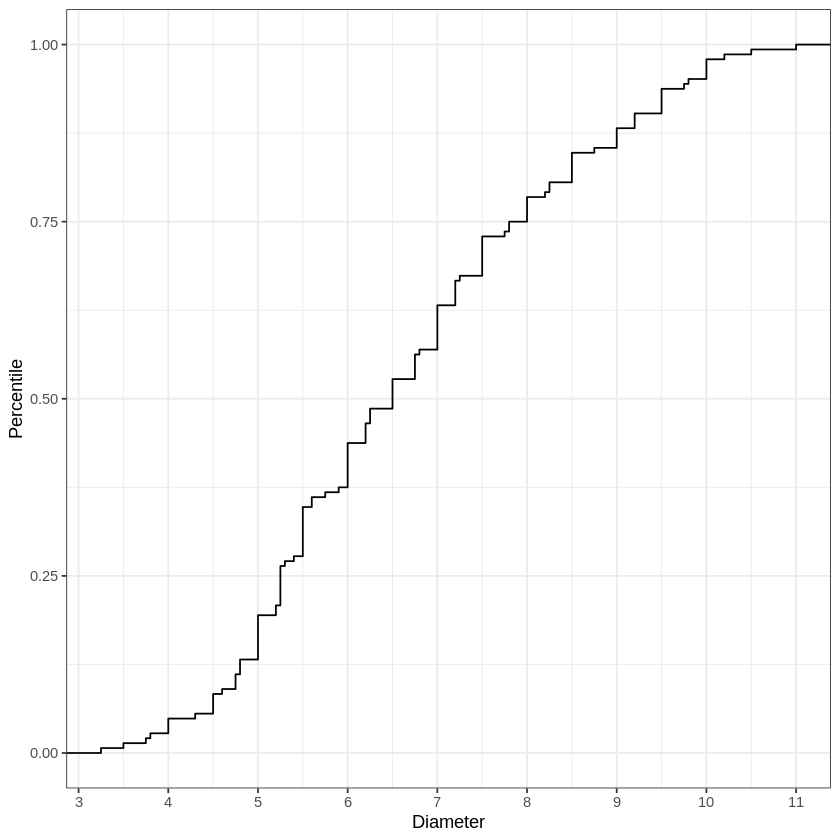

In [ ]:
#@title CDF Plot for Diameter
ggplot(ImpactCrater, aes(Diameter)) +
  stat_ecdf() +
  labs(y="Percentile") +
  scale_x_continuous(breaks=c(3,4,5,6,7,8,9,10,11)) +
  theme_bw()

## Comparing Summaries Across another Variable

**Question**: What is the influence of the projectile type on diameter?  


The following summary statistics and CDF plots will help in answering this question.

In [ ]:
#@title Summaries by Projectile Type
(ImpactCrater 
  %>% group_by(ProjectileType)
  %>% summarize(
                  Avg_Diameter = mean(Diameter),
                  Stdev_Diameter = sd(Diameter),
                  n_Diameter = n(),
                  Min_Diameter = min(Diameter),
                  Max_Diameter = max(Diameter)
                
               )
)

ProjectileType,Avg_Diameter,Stdev_Diameter,n_Diameter,Min_Diameter,Max_Diameter
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
GlassBall,6.640625,0.9667150,48,4.75,8.5
SteelBall,8.312500,1.4732906,48,5.00,11.0
WoodBall,5.073958,0.7663113,48,3.25,6.5


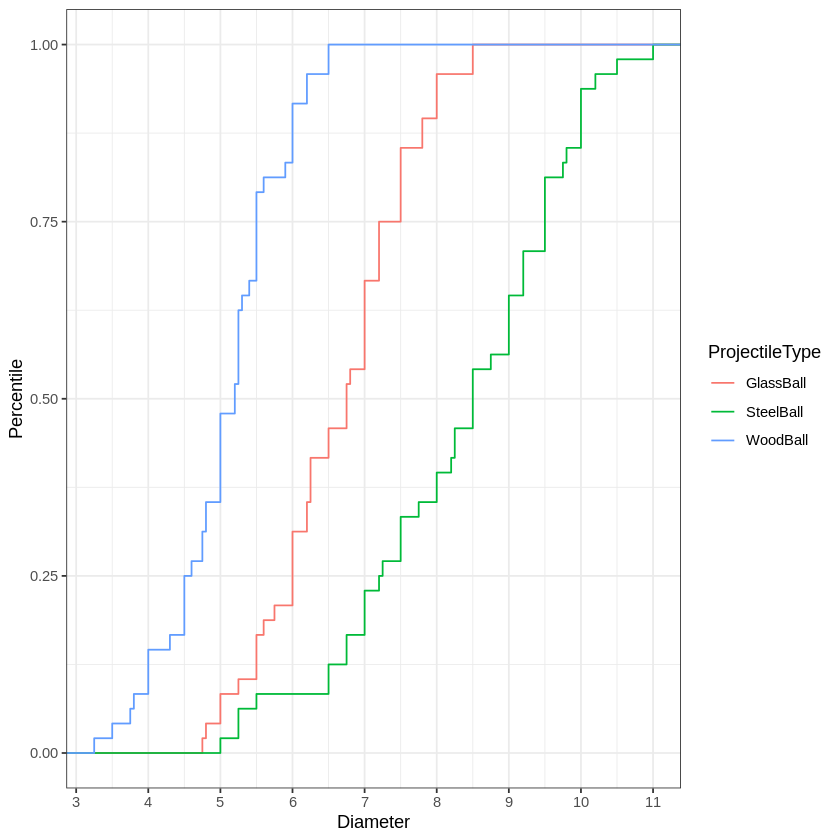

In [ ]:
#@title CDF Plot for Diameter by Projectile Type
ggplot(ImpactCrater, aes(Diameter, color=ProjectileType)) +
  stat_ecdf() +
  labs(y="Percentile") +
  scale_x_continuous(breaks=c(3,4,5,6,7,8,9,10,11)) +
  theme_bw()

In [ ]:
#@title Percentiles by Projectile Type
(ImpactCrater 
  %>% group_by(ProjectileType) 
  %>% summarise(
                enframe(
                          quantile(Diameter, c(0,0.025,0.05,0.10,0.20,0.25,0.30,0.40,0.5,0.60,0.70,0.75,0.80,0.90,0.975,1)), "Percentile", "Diameter")
                       )
  %>% pivot_wider(names_from = ProjectileType, values_from = Diameter)
)

**Question**: What is the influence of the sand type on diameter?  

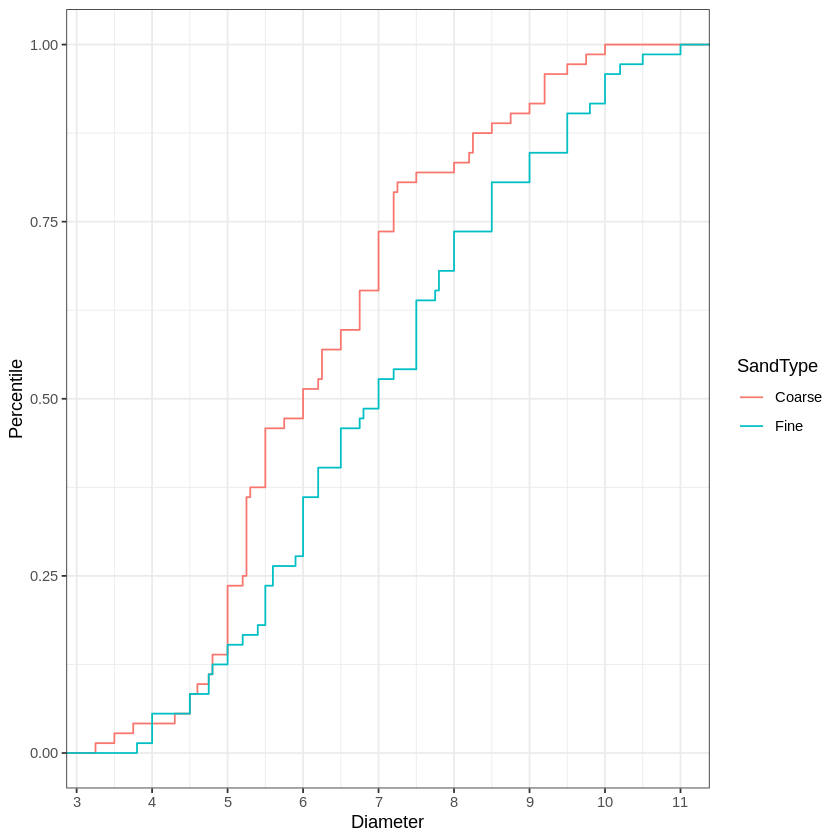

In [ ]:
#@title CDF Plot for Diameter by Sand Type
ggplot(ImpactCrater, aes(Diameter, color=SandType)) +
  stat_ecdf() +
  labs(y="Percentile") +
  scale_x_continuous(breaks=c(3,4,5,6,7,8,9,10,11)) +
  theme_bw()

**Question**: Which has a larger effect on Diameter -- Projectile Type or Sand Type?  

**Answer**: 

## Theoretical Density Function

A nature extension to the concept of percentiles is a **probability density function**.  A probability density function is a mathematical expression or model that is used extensively in statistical theory. By far, the most common probabilty density function is the **normal** distribution whose mathematical representaion is provided here. 

$$
N(\mu, \sigma) \sim \frac{1}{\sigma \sqrt{2\pi}}{e}^{-\frac{1}{2}\bigl(\frac{x-\mu}{\sigma}\bigr)^2}
$$

For example, a normal probabilty density function, with specification $N(\mu = 6.68, \sigma = 1.72)$ could be used to estimate the probability of observing a diameter less than 6, i.e. $P(Diameter < 6)$.

$$
\begin{array}{ccl}
 P(X < 6) & = & \int_{\infty}^{6} \frac{1}{1.72 \sqrt{2\pi}}{e}^{-\frac{1}{2}\bigl(\frac{x-6.68}{1.72}\bigr)^2} \,dx \\
 & = & 0.346 \\
 & = & 34.6\% \\
\end{array}
$$

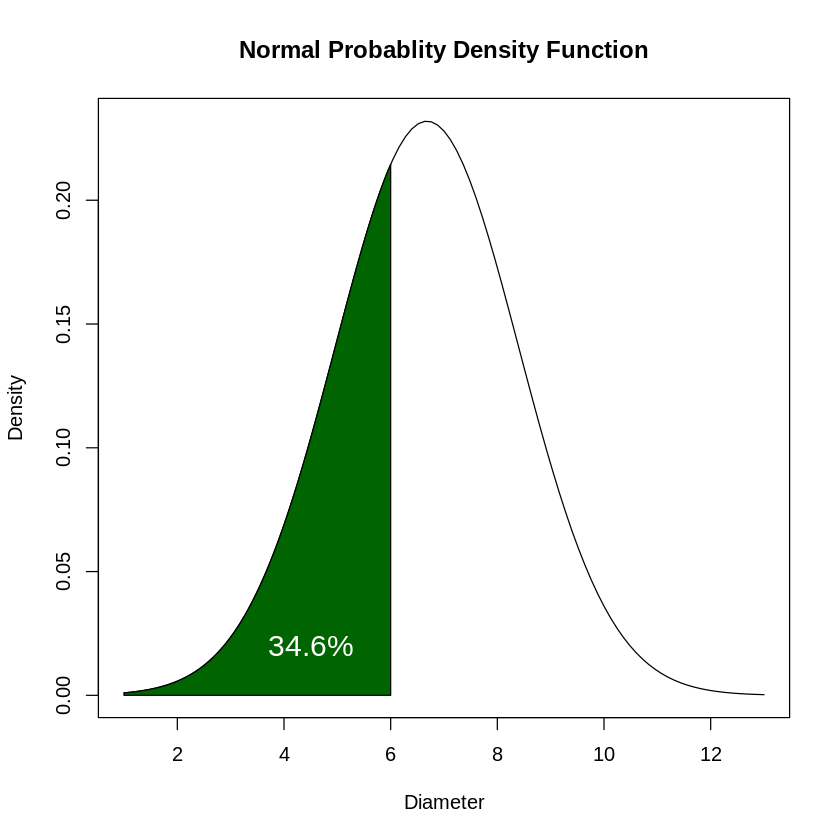

In [8]:
#@title Normal Density
curve(dnorm(x,6.68,1.72), xlim=c(1,13), main="Normal Probablity Density Function", xlab="Diameter",ylab="Density")
  
S.x  <- c(1,seq(1,6,0.01),6)
S.y  <- c(0,dnorm(seq(1,6, 0.01),6.68,1.72),0)
polygon(S.x,S.y, col="darkgreen")
text(4.5,0.02,"34.6%",col='white',cex=1.5)

## Empirical Density Function

The term **empirical** simply implies *from data*; thus, an empirical density function is a density function that is derived from data - not from some  mathematical model.


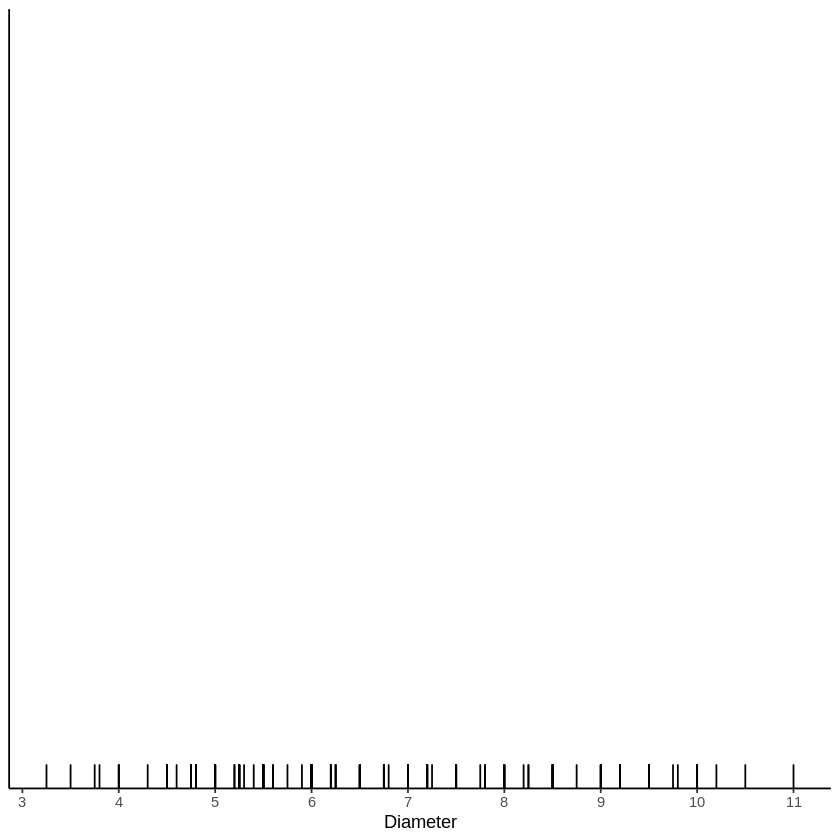

In [15]:
#@title Rug Plot of Diameter
ggplot(data=ImpactCrater, aes(x=Diameter)) + 
  geom_rug() + 
  scale_x_continuous(breaks=c(3,4,5,6,7,8,9,10,11)) +
  labs(x="Diameter") +
  theme_classic()

A **histrogram** of diameter is provided next.  Creating a histogram requires the following


*   Create bins of a desired size
*   Count the number of observations in each bin
*   Create a modified bar plot -- modified so that the bars touch each other to indicate that the variable being plotting is indeed continuous



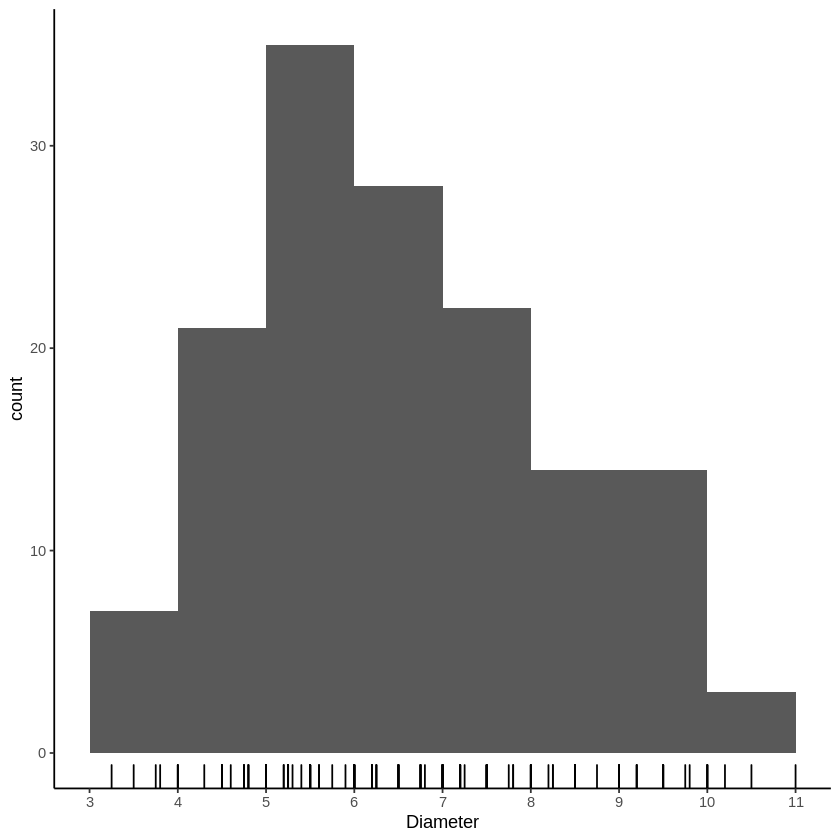

In [17]:
#@title Histogram of Diameter
ggplot(data=ImpactCrater, aes(x=Diameter)) + 
  geom_rug() + 
  geom_histogram(breaks=c(3,4,5,6,7,8,9,10,11)) + 
  scale_x_continuous(breaks=c(3,4,5,6,7,8,9,10,11)) +
  theme_classic()

Consider the following variation of the histogram above that plots the Diameter values against the density -- instead of counts.

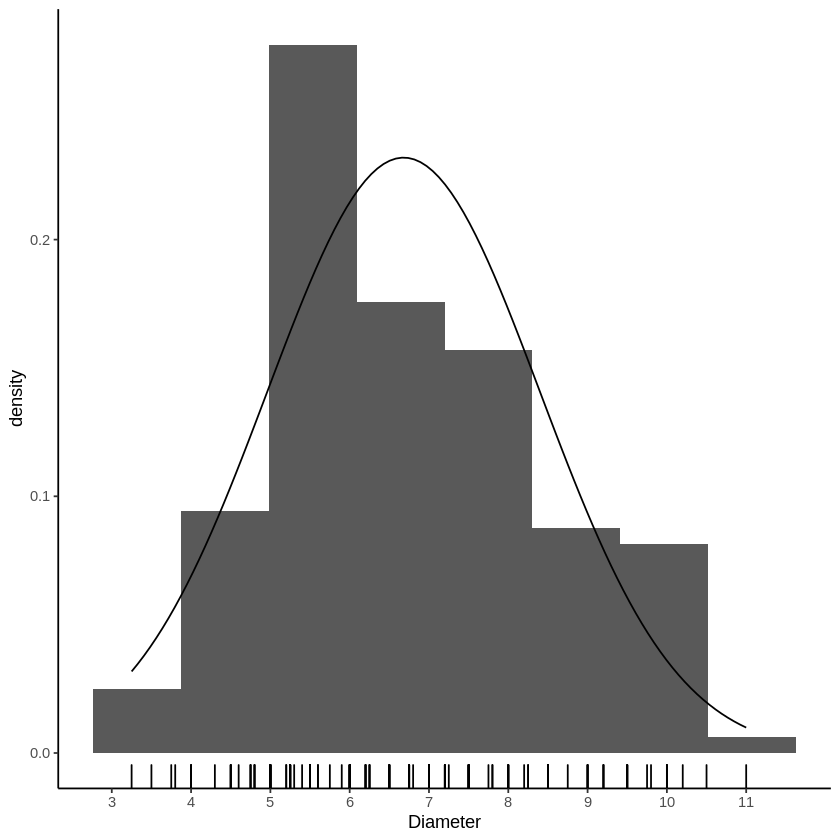

In [22]:
#@title How Well does Normal Curve Fit
ggplot(data=ImpactCrater, aes(x=Diameter)) + 
  geom_rug() + 
  geom_histogram(aes(y=..density..),bins=8) + 
  stat_function(fun = dnorm, args = list(mean = c(6.68), sd = c(1.72))) + 
  scale_x_continuous(breaks=c(3,4,5,6,7,8,9,10,11)) + 
  theme_classic()

<table width='100%'><tr><td bgcolor="orange"><font size="+2">Task</font></td></tr></table>

### Task:  Modify Number of Bins



*   Change the number of bins used to create the above histrogram (i.e. change value for bins in geom_histogram() line). How many bins appear to be best for matching the normal probability density?
*   Do you believe it is reasonable to use a normal probability model as a density function for Diameter?  Discuss.



<table width='100%'><tr><td bgcolor="orange"><font size="+2">&nbsp;</font></td></tr></table>

## Kernal Smoothing 

The most common method to obtain an empirical density function is to use **kernal smoothing**.  This is discussed next.

Wiki Page:  http://en.wikipedia.org/wiki/Kernel_density_estimation



<p align='center'><img src="https://drive.google.com/uc?export=view&id=1Ue3FThXfkr42JInNYrCdpU-dUsKWtumy"></img></p>


<p align='center'><img src="https://drive.google.com/uc?export=view&id=1IulwkekvY1Yb3FvbfTH4F2KVqMNvN6Ha"
></p>

There are several factors that influence the amount of smoothing being done by the kernal smoother.

*   Kernal density -- what density is being used
*   Standard deviation in kernal density - amount of spread in kernal density
*   Window / weighting - which observations are being included by the smoother



<p align='center'><img src="https://drive.google.com/uc?export=view&id=1nD8MTlatMSZ17MDgrZFOvMMud9kf4swP" height="25%" width="25%"></p>

Consider the following window where the kernal density is specified as a normal distribution.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1ktCrwy-KFlcmJz5i94dEQhvvjWKsZDGz" width="25%" height = "25%"></p>

The density value from each kernal included within the window is summed to obtain a density value for a particular point.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1eym3kYE56H947s2gCOnR5ryggL4BAXFe" width="25%" height = "25%"></p>

The window is moved over and the process is repeated for all values.


<p align='center'><img src="https://drive.google.com/uc?export=view&id=1j20rDTXpq6Bm154UQTJY03-Z1QPcPWKD" width="25%" height = "25%"></p>

## Kernal Smoother for Diameter

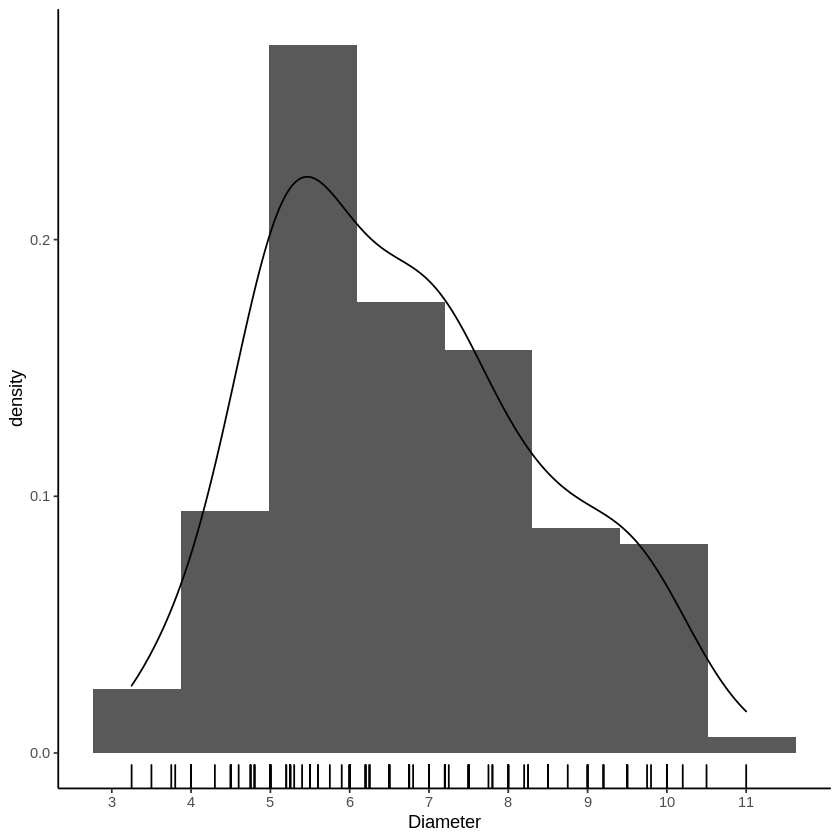

In [24]:
#@title Empirical Density Function
ggplot(data=ImpactCrater, aes(x=Diameter)) + 
  geom_rug() + 
  geom_histogram(aes(y=..density..),bins=8) + 
  geom_density(adjust=1) +
  #stat_function(fun = dnorm, args = list(mean = c(6.68), sd = c(1.72))) + 
  scale_x_continuous(breaks=c(3,4,5,6,7,8,9,10,11)) + 
  theme_classic()

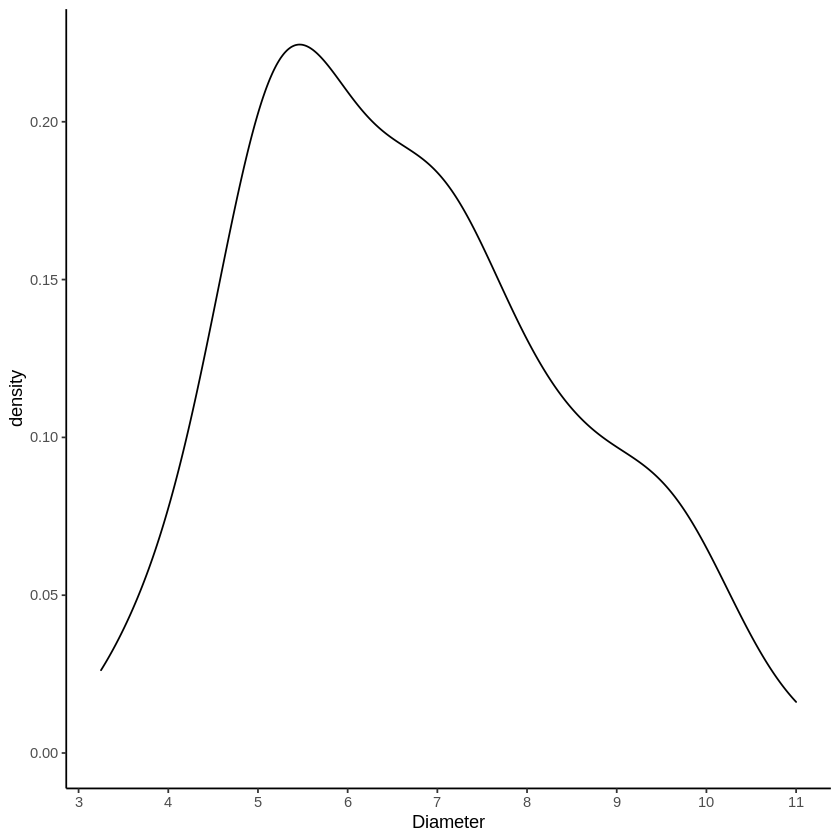

In [27]:
#@title Empirical Density Function - Version 2
ggplot(data=ImpactCrater, aes(x=Diameter)) + 
  #geom_rug() + 
  #geom_histogram(aes(y=..density..),bins=8) + 
  geom_density(adjust=1) +
  #stat_function(fun = dnorm, args = list(mean = c(6.68), sd = c(1.72))) + 
  scale_x_continuous(breaks=c(3,4,5,6,7,8,9,10,11)) + 
  theme_classic()

<table width='100%'><tr><td bgcolor="orange"><font size="+2">Task</font></td></tr></table>

### Task:  Understanding Smoothing



*   In the code above, modify the window size by changing the adjust option in the geom_density() line.
*   What is meant by over-smoothing?  
*   What is meant by under-smoothing?



<table width='100%'><tr><td bgcolor="orange"><font size="+2">&nbsp;</font></td></tr></table>

## Empirical Density Function be Projectile Type

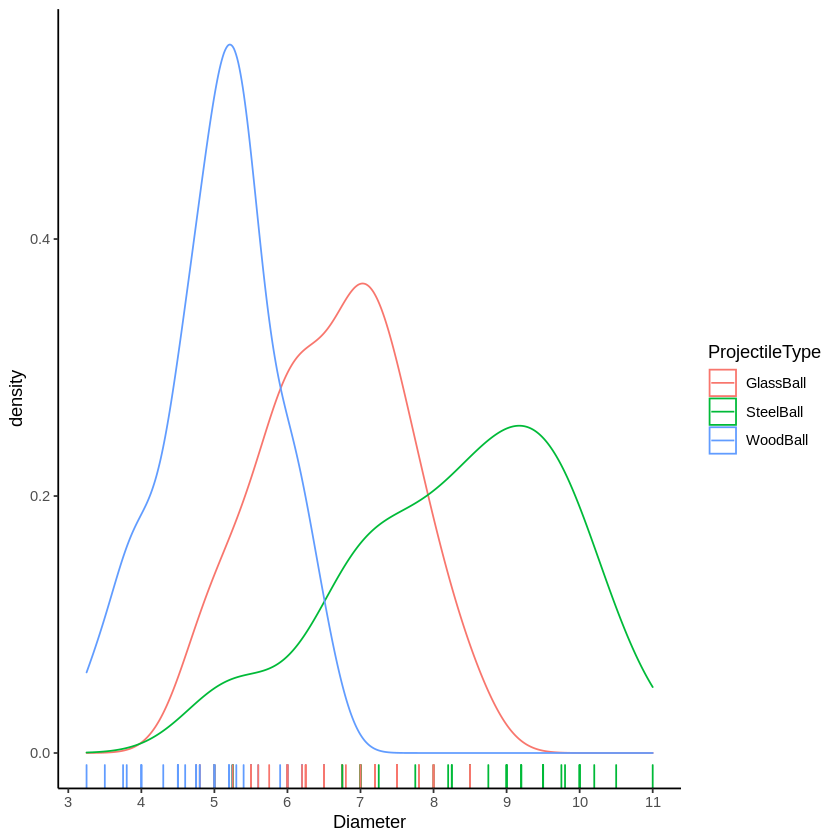

In [31]:
#@title EDF By Projectile Type
ggplot(data=ImpactCrater, aes(x=Diameter, color=ProjectileType)) + 
  geom_rug() + 
  #geom_histogram(aes(y=..density..),bins=8) + 
  geom_density(adjust=1) +
  #stat_function(fun = dnorm, args = list(mean = c(6.68), sd = c(1.72))) + 
  scale_x_continuous(breaks=c(3,4,5,6,7,8,9,10,11)) + 
  theme_classic()

<table width='100%'><tr><td bgcolor="orange"><font size="+2">Task</font></td></tr></table>

### Questions



1.   What is the effect of Projectile Type on Diameter?
2.   Does Projectile Type or Sand Type appear to have a larger effect on Diameter?  Discuss.



<table width='100%'><tr><td bgcolor="orange"><font size="+2">&nbsp;</font></td></tr></table>

End of Document